In [1]:
from pandas import read_csv
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load data
data=read_csv("diabetes.csv")

In [3]:
data.head(4)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


In [4]:
array = data.values
X = array[:, 0:-1]
Y = array[:, -1]


In [5]:
#data train and transform
scaler = MinMaxScaler()
scaler.fit(X)

X=scaler.transform(X)

In [6]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

# choose the best value of k

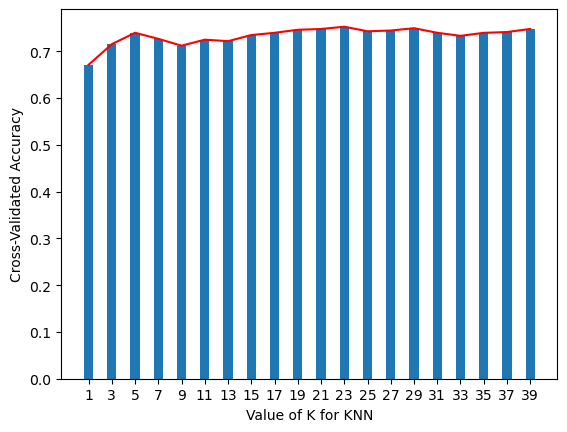

In [7]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = [2*i+1 for i in range(0,20)]
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores,color="red")

plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.show()

In [8]:
#making dataframe and alloting values
scores=pd.DataFrame()
scores["K_values"]=k_range
scores["Scores"]=k_scores
scores.sort_values(["Scores"],ascending=False)

,K_values,Scores
11,23,0.752485
14,29,0.749313
19,39,0.747673
10,21,0.747620
9,19,0.745955
13,27,0.744342
12,25,0.742755
18,37,0.741116
2,5,0.739556
15,31,0.739529


# build final model

In [9]:
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
accuracy_score(y_test,pred)

0.7337662337662337

In [10]:
from pickle import dump
from pickle import load

dump(knn, open('knn.sav', 'wb'))

In [11]:
loaded_model = load(open('knn.sav', 'rb'))
result = loaded_model.score(X, Y)
print(result)

0.7630208333333334


In [12]:
ls


 Volume in drive C is Windows
 Volume Serial Number is C23B-E0ED

 Directory of C:\Users\Harsha S

07-02-2023  14:52    <DIR>          .
14-11-2022  21:04    <DIR>          ..
07-02-2023  14:52    <DIR>          .conda
14-11-2022  12:35                25 .condarc
14-11-2022  20:11    <DIR>          .continuum
31-12-2022  22:07    <DIR>          .cufflinks
07-02-2023  14:51    <DIR>          .ipynb_checkpoints
14-11-2022  20:12    <DIR>          .ipython
16-11-2022  11:12    <DIR>          .jupyter
25-01-2023  12:56    <DIR>          .keras
16-11-2022  11:21    <DIR>          .matplotlib
30-12-2022  11:55    <DIR>          .ms-ad
02-02-2023  13:31    <DIR>          .streamlit
02-02-2023  11:25    <DIR>          .vscode
06-02-2023  10:36           864,897 50_Startups.ipynb
02-02-2023  13:39           337,439 airfoil_self_noise.ipynb
02-02-2023  13:26             2,023 appupdated.py
06-02-2023  10:53         1,309,720 Assignment_14.1.ipynb
06-02-2023  10:53         1,036,645 Assignment_14

# deploy the model

In [13]:
!streamlit run appupdated.py

^C


In [14]:
!pip install streamlit 
